In [11]:
import scanpy as sc
import numpy as np

In [12]:
print(sc.__version__)
sc.settings.verbosity = 3
# Load in the data
adata = sc.read_10x_mtx("C:/Users/Amit Elia/Documents/CSE185/Patient2/",var_names='gene_symbols', cache=True)
adata.head()

... reading from cache file cache\C-Users-Amit Elia-Documents-CSE185-Patient2-matrix.h5ad


1.7.2


AttributeError: 'AnnData' object has no attribute 'head'

In [13]:
print(adata)

AnnData object with n_obs × n_vars = 737280 × 33538
    var: 'gene_ids', 'feature_types'


<ipython-input-14-2919926c7dc1>:2: RuntimeWarning: invalid value encountered in true_divide
  adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
normalizing counts per cell
    finished (0:00:00)


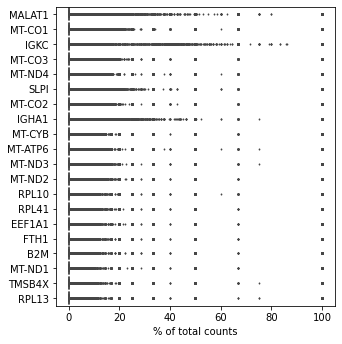

In [14]:
mito_genes = adata.var_names.str.startswith('mt-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
sc.pp.filter_cells(adata, min_genes=0)
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

adata_filt = adata[(adata.obs['n_counts']<500) & (adata.obs['percent_mito']<0.2), :]
sc.pl.highest_expr_genes(adata, n_top=20)

In [ ]:
def save_matrix_to_h5(gbm, filename, genome):
    flt = tables.Filters(complevel=1)
    with tables.open_file(filename, 'w', filters=flt) as f:
        try:
            group = f.create_group(f.root, genome)
            f.create_carray(group, 'genes', obj=gbm.gene_ids)
            f.create_carray(group, 'gene_names', obj=gbm.gene_names)
            f.create_carray(group, 'barcodes', obj=gbm.barcodes)
            f.create_carray(group, 'data', obj=gbm.matrix.data)
            f.create_carray(group, 'indices', obj=gbm.matrix.indices)
            f.create_carray(group, 'indptr', obj=gbm.matrix.indptr)
            f.create_carray(group, 'shape', obj=gbm.matrix.shape)
        except:
            raise Exception("Failed to write H5 file.")
            
save_matrix_to_h5(gbm, filename, genome)

In [18]:
print(adata_filt)
adata_filt.write('write/test2_raw.h5ad', compression='gzip')

AnnData object with n_obs × n_vars = 458014 × 33538
    obs: 'percent_mito', 'n_genes', 'n_counts'
    var: 'gene_ids', 'feature_types'
